<a href="https://colab.research.google.com/github/Lamiv/ds_training/blob/main/Time_Series_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
# Example by Dr. Varshita
```




#Time Series Analysis

## EDA

Data sourced from dataset  "Open Power System Data"
Data on Load, wind and solar, prices in hourly resolution
More details here: https://data.open-power-system-data.org/time_series/

Our aim is to predict consumption based on 10 years data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",")

In [ ]:
#data preview
data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


Looks like the data is collected by day, so we know the period is daily

In [ ]:
#check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [ ]:
#fix date format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [ ]:
#pandas shows the dataframe is now DatetimeIndexed, but lists no clear frequency. Set it to daily
data = data.asfreq('D')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Freq: D
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [ ]:
#what if some days are not covered, use fillna ffill to fill the missing days
data.fillna( method='ffill', inplace=True, axis=0 )

Lets see this timeseries now


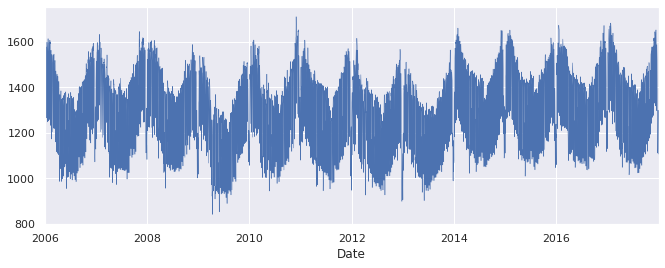

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
data['Consumption'].plot(linewidth=0.5);

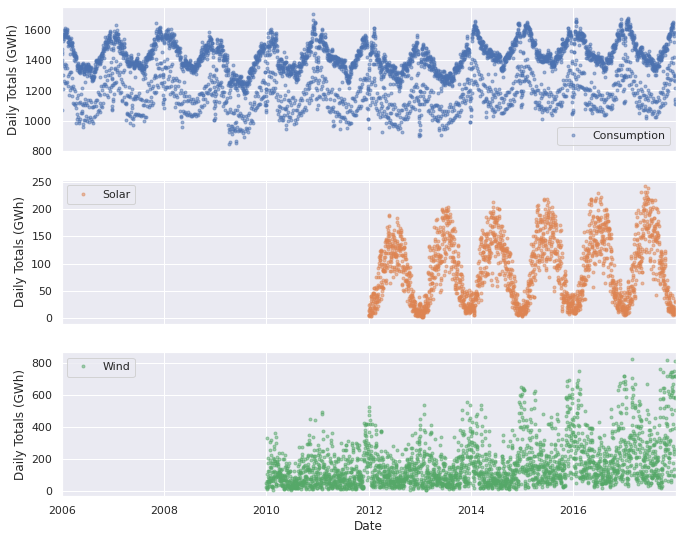

In [ ]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Seasonality ? plot data of a year

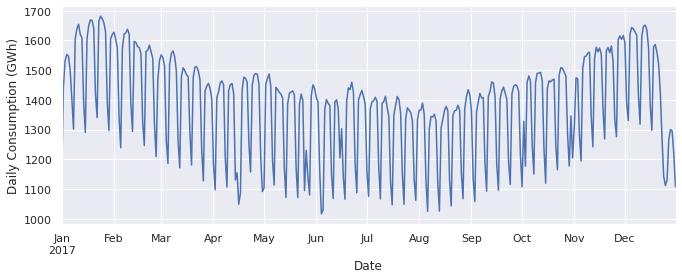

In [ ]:
ax = data.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

Zoom in to a month

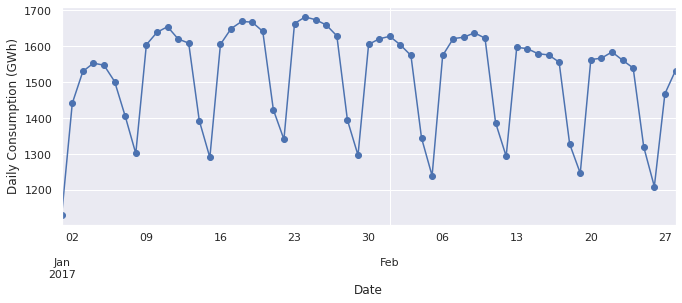

In [ ]:
ax = data.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

For better visualization of seasonality...
</br>Visualize it weekly? Every Monday?

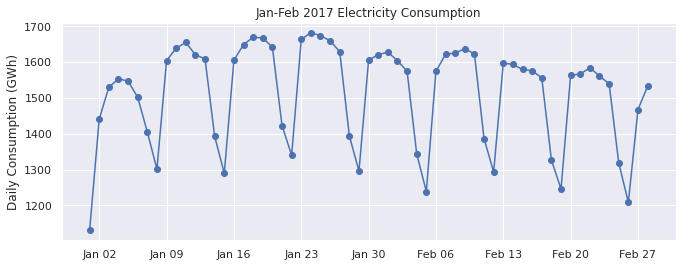

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(data.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Seasonality blot plots

In [ ]:
# Add columns with year, month, and weekday name
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.weekday

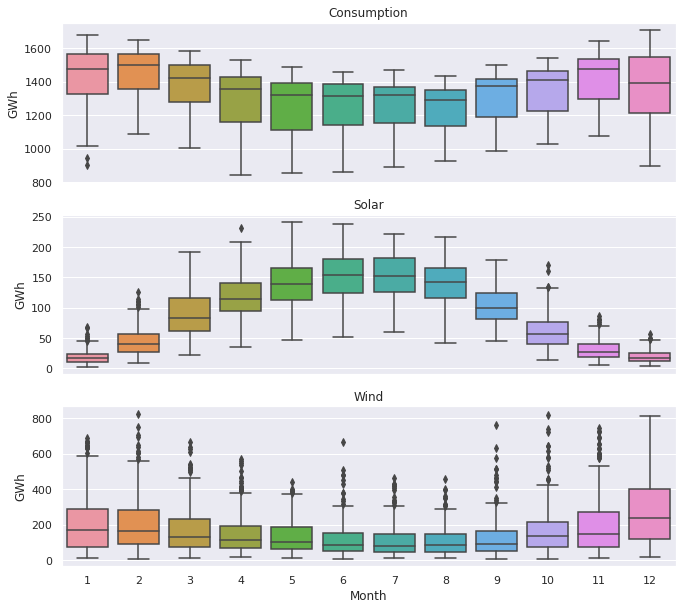

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=data, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  # Remove the automatic x-axis label from all but the bottom subplot
  if ax != axes[-1]:
      ax.set_xlabel('')

Trend

In [ ]:
#Trend is the smooth long term tendency of a time series . 
#compute a 7 day rolling mean
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_7d_rol = data[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Trends in Electricity Consumption')

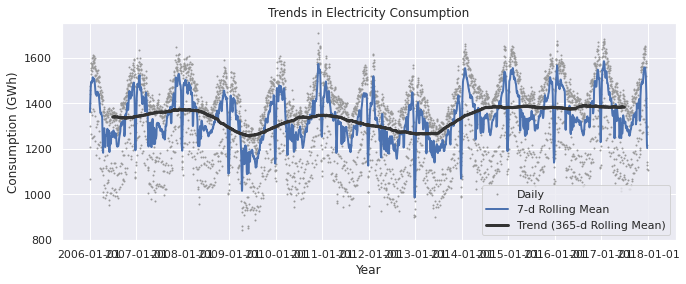

In [ ]:
# 365 days rolling
data_365d_rol = data[data_columns].rolling(window = 365, center = True).mean()

fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['Consumption'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# Beautification of plot
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

Check day of the week trend

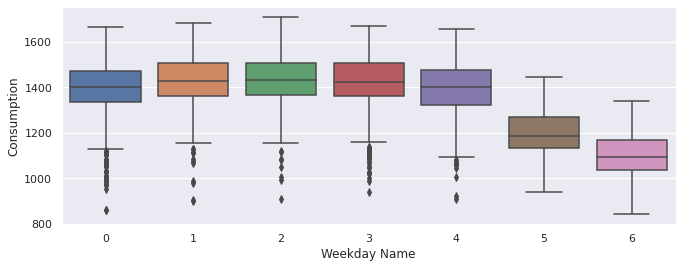

In [ ]:
sns.boxplot(data=data, x='Weekday Name', y='Consumption');

###Resampling
Lower degree sample means aggregation operation

In [ ]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
# Resample to weekly frequency, aggregating with mean
weekly_mean = data[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].resample('W').mean()
weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


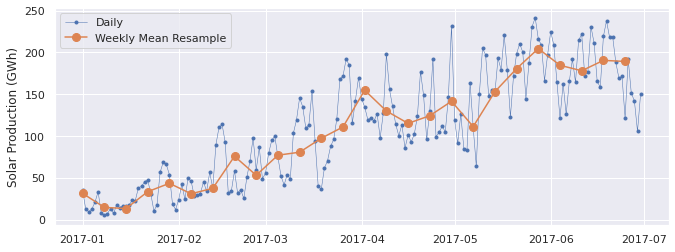

In [ ]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

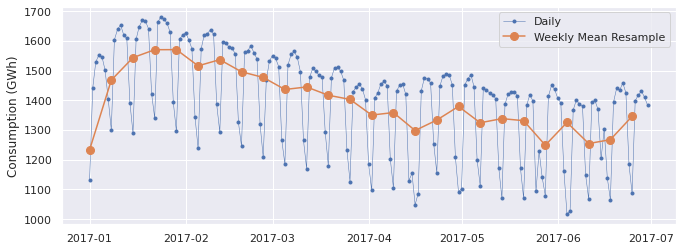

In [ ]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Consumption'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(weekly_mean.loc[start:end, 'Consumption'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Consumption (GWh)')
ax.legend();

## Feature engineering

In [ ]:
# define a metric function so we understand the performance
# We will use the R-Square score and Mean Square Error metrics
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
# The idea is to find difference in consumption between 2 days and see how the consumption is increasing or decreasing on daily basis
# So Step 1 is to determine yesterday's consumption for each date
consumption = data[['Consumption']]
# add a new column, and copy day -1 (shift down) values to it
consumption.loc[:,'Yesterday'] = consumption.loc[:,'Consumption'].shift()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
consumption

,Consumption,Yesterday
Date,,
2006-01-01,1069.18400,NaN
2006-01-02,1380.52100,1069.18400
2006-01-03,1442.53300,1380.52100
2006-01-04,1457.21700,1442.53300
2006-01-05,1477.13100,1457.21700
...,...,...
2017-12-27,1263.94091,1130.11683
2017-12-28,1299.86398,1263.94091
2017-12-29,1295.08753,1299.86398


In [ ]:
# next, we calculate the difference between the value of yesterday, and the day before
consumption.loc[:,'Yesterday_Diff'] = consumption.loc[:,'Yesterday'].diff()
# then remove the NaN values
consumption = consumption.dropna()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4381 entries, 2006-01-03 to 2017-12-31
Freq: D
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Consumption     4381 non-null   float64
 1   Yesterday       4381 non-null   float64
 2   Yesterday_Diff  4381 non-null   float64
dtypes: float64(3)
memory usage: 136.9 KB


## Train Test split
We have data from 2006  - 2017, lets keep data of 2017 for testing. Remaining for training.

In [ ]:
X_train = consumption[:'2016'].drop(['Consumption'], axis = 1)
y_train = consumption.loc[:'2016', 'Consumption']
X_test = consumption['2017'].drop(['Consumption'], axis = 1)
y_test = consumption.loc['2017', 'Consumption']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Find Patterns 

What will be the Cross Validation method for Time Series - not K-Folds? Why?
Time series have a indexed on the date-time sequence -> the natural ordering, and that can not be randomized as it will not preserve this ordering.
So what is alternative? 
"Forward Chaining Strategy"
</br>
Means if we have 4 years [1,2,3, 4 ] then the 3 folds will look like this:

1.   fold 1: training [1], validation [2]
2.   fold 2: training [1 2], validation [3]
3.   fold 3: training [1 2 3], validation [4]

So successive sets are supersets of preceeding sets


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
# Ready the models for evaluation
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear

### Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score

LR: 0.343747 (0.029773)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

NN: 0.500998 (0.099275)
KNN: 0.646307 (0.083185)
RF: 0.620415 (0.083207)
SVR: -0.117944 (0.157755)


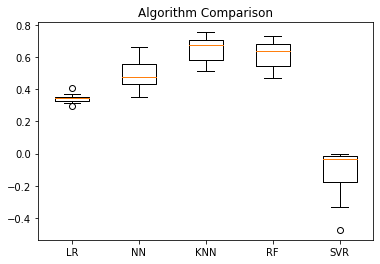

In [ ]:
### Evaluate one by one and store results for comparison

results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Observation is both KNN and RF perform almost equally well. 
Which one will you prefer?
RF - ensemble - many trees working together to give superior prediction

### Hyper parameter Tuning
Gridsearch!

In [ ]:
#Custom scorer
from sklearn.metrics import make_scorer
def rmse(actual, predict):
  predict = np.array(predict)
  actual = np.array(actual)
  distance = predict - actual
  square_distance = distance ** 2
  mean_square_distance = square_distance.mean()
  score = np.sqrt(mean_square_distance)
  return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [ ]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.7291
mean_squared_log_error:  0.0041
r2:  0.7264
MAE:  55.0603
MSE:  7408.0343
RMSE:  86.0699


## More feature engineering

In [ ]:
# creating copy of original dataframe
consumption_2 = consumption.copy()
# inserting column with yesterday-1 values
consumption_2['Yesterday-1'] = consumption_2['Yesterday'].shift()
# inserting column with difference in yesterday-1 and yesterday-2 values.
consumption_2['Yesterday-1_Diff'] = consumption_2['Yesterday-1'].diff()
# dropping NAs
consumption_2 = consumption_2.dropna()

In [ ]:
X_train_2 = consumption_2[:'2016'].drop(['Consumption'], axis = 1)
y_train_2 = consumption_2.loc[:'2016', 'Consumption']
X_test_2 = consumption_2['2017'].drop(['Consumption'], axis = 1)
y_test_2 = consumption_2.loc['2017', 'Consumption']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
## Re-train
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train_2, y_train_2)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
y_true = y_test_2.values
y_pred = best_model.predict(X_test_2)
regression_results(y_true, y_pred)

explained_variance:  0.8378
mean_squared_log_error:  0.0025
r2:  0.8378
MAE:  40.8747
MSE:  4392.2079
RMSE:  66.2737
